In [4]:
import keras as ks
print(ks)

<module 'keras' from '/home/batman/miniconda3/envs/deep/lib/python3.6/site-packages/keras/__init__.py'>


In [5]:
from pprint import pprint
import os, shutil
import PIL # THis uses pillow


In [3]:
# for (path, dirs, files) in os.walk(small_base_dir):
#     files = [file for file in files]
#     #print(path, "elements:", len(files))
#     print(path)

In [6]:
root_path = "/media/batman/Windows/Dropbox/DATA/cats_dogs_small"
for (path, dirs, files) in os.walk(root_path):
    
    files = [file for file in files]
    print(path, "elements:", len(files))
    
# path_train = r"C:\Data TEMP\cats_dogs_small\train"
# path_test = r"C:\Data TEMP\cats_dogs_small\test"
# path_validation = r"C:\Data TEMP\cats_dogs_small\validation"

# path_test_cats = "C:\Data TEMP\cats_dogs_small\test\cats"
# path_test_dogs = "C:\Data TEMP\cats_dogs_small\test\dogs"

# path_train_cats = "C:\Data TEMP\cats_dogs_small\train\cats"
# path_train_cats = "C:\Data TEMP\cats_dogs_small\train\dogs"

# path_validation_cats = "C:\Data TEMP\cats_dogs_small\validation\cats"
# path_talidation_cats = "C:\Data TEMP\cats_dogs_small\validation\dogs"

/media/batman/Windows/Dropbox/DATA/cats_dogs_small elements: 0
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/test elements: 0
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/test/cats elements: 500
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/test/dogs elements: 500
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/train elements: 0
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/train/cats elements: 1000
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/train/dogs elements: 1000
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/validation elements: 0
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/validation/cats elements: 500
/media/batman/Windows/Dropbox/DATA/cats_dogs_small/validation/dogs elements: 500


In [27]:
model = ks.models.Sequential()

model.add(ks.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(64, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(128, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(128, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Flatten()) # This is just a reshape!

model.add(ks.layers.Dropout(0.5))

model.add(ks.layers.Dense(512,activation="relu"))
model.add(ks.layers.Dense(1,activation="sigmoid"))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [29]:
model.compile(   
    optimizer = ks.optimizers.RMSprop(lr=0.0001),
    loss= ks.losses.binary_crossentropy,
    metrics= ["accuracy"],
)

In [30]:
ks.preprocessing

<module 'keras.preprocessing' from 'C:\\anaconda3\\lib\\site-packages\\keras\\preprocessing\\__init__.py'>

In [31]:
print(ks.__version__)

from keras.prepocessing.image import ImageDataGenerator

#print(ks.preprocessing.image)

2.1.2


ModuleNotFoundError: No module named 'keras.prepocessing'

In [32]:
from keras.preprocessing import image as image_utils

train_datagen = image_utils.ImageDataGenerator(rescale=1/255,
                                              rotation_range = 40,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range= 0.2,
                                              horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"

)

Found 2000 images belonging to 2 classes.


In [33]:
validation_datagen = ks.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


In [50]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 50,
    )

Epoch 1/30
100/100 [==============================] - 95s 951ms/step - loss: 0.5914 - acc: 0.6830 - val_loss: 0.5748 - val_acc: 0.6840
Epoch 2/30
100/100 [==============================] - 94s 944ms/step - loss: 0.5825 - acc: 0.6975 - val_loss: 0.5370 - val_acc: 0.7180
Epoch 3/30
100/100 [==============================] - 94s 938ms/step - loss: 0.5831 - acc: 0.6995 - val_loss: 0.5438 - val_acc: 0.7150
Epoch 4/30
100/100 [==============================] - 96s 963ms/step - loss: 0.5796 - acc: 0.6885 - val_loss: 0.5313 - val_acc: 0.7080
Epoch 5/30
100/100 [==============================] - 97s 968ms/step - loss: 0.5701 - acc: 0.7010 - val_loss: 0.5209 - val_acc: 0.7260
Epoch 6/30
100/100 [==============================] - 98s 981ms/step - loss: 0.5535 - acc: 0.7185 - val_loss: 0.5192 - val_acc: 0.7410
Epoch 7/30
100/100 [==============================] - 97s 973ms/step - loss: 0.5589 - acc: 0.7060 - val_loss: 0.5293 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 9

In [51]:
#pprint(history)
history_dict = history.__dict__

In [52]:
#pprint(history_dict)

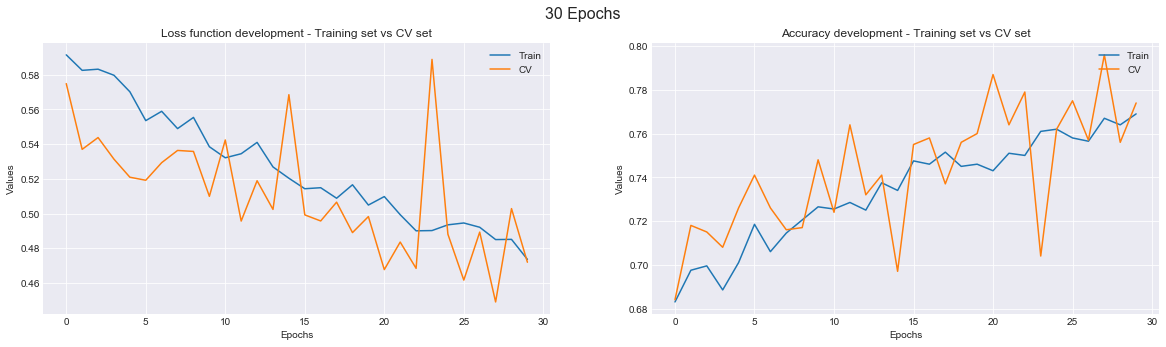

In [53]:
model_title = "30 Epochs"
def plot_hist(history_dict):
    fig = plt.figure(figsize=(5,4))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False)
    
    ax1.plot(history_dict['epoch'],  history_dict['history']['loss'],label="Train")
    ax1.plot(history_dict['epoch'],  history_dict['history']['val_loss'],label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')
    
    ax2.plot(history_dict['epoch'],  history_dict['history']['acc'],label="Train")
    ax2.plot(history_dict['epoch'],  history_dict['history']['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')
    
    plt.suptitle(model_title, fontsize=16)
    
    plt.show()

plot_hist(history_dict)